# Здравствуйте! 

Это тестовое задание [Артемия Фирсова](https://novosibirsk.hh.ru/resume/f10e3e23ff03e9972b0039ed1f535a36586465) на позицию Data Scientists в компанию Dialog - https://novosibirsk.hh.ru/vacancy/28058601 

Изначально задание было поставлено так:

`Требуется разработать классификатор для встраивания в наш push-сервис. Нужно классифицировать картинку по трем категориям: фото, скриншот или просто картинка.
Выполненное задание мы ожидаем в виде репозитория на github с readme  инструкциями для проверки.
Желаем успехов в выполнении данного задания! Мы верим – Вы справитесь (тут был смайлик, проблемы с кодировкой)`

## После обсуждения с Анастасией, картина особо не изменилась:

*Anastasia*
Артемий, посмотрите, пожалуйста задание, если есть вопросы задавайте
Потому что знаю, что задание слегка рыхловатое и не до конца понятное
в целом оно предполагает творческий подход, то есть вы можете сделать все на свое усмотрение и в комментариях после указать критерии которые вы избрали для выполнения

*Artemiy*
Спасибо! Да, вопросы есть:
1) Непонятно как связан пул сервис и классификатор.
2) Есть ли данные, на которых вы ожидаете увидеть результат? 
3) Что такое фото скриншот и картинка? Какая вариативность ожидается в этих данных?
Вопросы возникают, поскольку у могу взять портретные фото людей, скриншоты монитора программы Excel и картинки из мультика "Ежик в тумане", прогнать их через натренированный на imagenet vgg, взять фичи и построить классификатор (уверен с такими разными данными даже knn подойдёт) и он будет классно работать чисто на этих данных)). Поэтому возможно у вас есть пул изображений, на которых можно отвалидировать решение.

*Anastasia*
1) После отправления изображения, классификатор должен классифицировать изображение и вернуть результат классификации в пуш-сервис для отправки уведомления пользователю
2) Данных нет, вы можете использовать свои любые изображения для демонстрации работы классификатора
В общем, как мне обьяснил руководитель
При выполнении тестового задания мы ожидаем увидеть от человека ход его мыслей.  Нет конретных параметров выполнения тестового задания. Вы можете выбрать удобный для вас формат выполенния, набор картинок/фотографий/скриншотов

*Artemiy*
Хорошо, понял, спасибо).

*Anastasia*
Мы даем простор для фантазии и творчества)
то есть вы сами можете для демонтрации навыков выбрать какой то сложный ход действий и описать его, что станет несомненным плюсом в оценке ваших способностей)
https://novosibirsk.hh.ru/vacancy/28058601

## Но появилось важное замечание

Можно делать все, что угодно!
Отсюда и начнем.

Сразу заметим, что стоит задача классификации, и классифицировать нужно объекты на 3 класса: 
* Фото
* Скриншоты
* Картинки


## Теперь нужно понять, что же представляют из себя эти классы

Поскольку четких границ нет, то для начала определим рамки наших классов

### Что же за классы такие?
Довольно непонятные категории. Фото могут любые - портретные, специализированные, природы и т.д. Возникает ощущение, что нужно уточнять требования, но поскольку все оставлено на мое усмотрение, для начала немного порассуждаем.

Когда рассуждаешь, как отличить фото от скриншота, приходит мысль, что физически это абсолютно разные вещи.

Камера фотографирует пейзаж, и фотончики проходят длинный путь от отражения до попадания на линзу и далее через систему линз падают на светочувствительные элементы, превращаясь в электрический сигнал. который по "проводкам" идет в АЦП, после чего претерпевает нелинейные преобразования, чтобы превратится в набор чисел. После чего этот самый набор чисел может с искажения нам показываться, но по сути это неважно, т.к. мы работаем с файлом, который в идеале получился после создания фото (но Photoshop никто не отменял).

Скриншоты же - это просто те самые числа, которые показываются нам не из естественной среды, а смоделированные дизайнером с помощью специальных программ (если не считать скриншоты последней оси Apple Watch, где они снимали кадры огня, воды и т.д., чтобы использовать это в качестве заставки). Также у них потенциально имеются части изображения, характерные для операционных систем, программ и т.д.

Так или иначе, фото должны обладать абберациями, зашумлениями и т.д. - это потенциальная возможность для классификации + уже [были](https://www.kaggle.com/c/sp-society-camera-model-identification) успешные работы по идентификации камер по их фотографиям. Это дает потенциальную возможность переиспользовать существующие подходы для распознования фото с камеры. Но для proof-of-concept это возможно долго))). Пока что оставим идею в бэклоге.

Перейдем к картинкам. Очень непонятная категория. Если у фотографий есть абберации, у скриншотов части, характерные ОС и программам, то у картинок может быть все, что угодно. По сути картинка - это родитель фото и скриншотов. Тут придется жестко ограничить этот класс.

Рассуждать можно долго, предлагаю условиться на следующих характеристиках наших классов:
* Фото - портретные, природы, etc. сделанные с разных устройств.
* Скриншоты - с разных устройтсв, имеющие куски характерные для ОС.
* Картинки - мультяшные, более менее не из реального мира.

Ограничения жесткие, но дают понимание feasibility задачи + оставляют возможность переиспользования данных при создании полной системы.

Теперь переходим к сбору датасета. 

## Начнем со скриншотов

Согласно [статистике](https://developer.apple.com/support/app-store/) 93% ползователей iOS используют 11 и 12 версии. Поэтому закачаем 10-12 версии и достаточно. Чтобы не погрязнуть в сборке датасета закачаем по 4 фото с разных экранов.

[Также](https://www.computerworld.com/article/3199373/windows-pcs/windows-by-the-numbers-windows-10-backtracks-windows-7-remains-resilient.html) сделаем c Windows и [Android](https://www.digitaltrends.com/mobile/android-distribution-news/) - для Android оказалось тяжко найти картинки специфичные для версии ОС, поэтому сделал их поменьше.

## Фото 

Для фото выберем основные категории - еда, дом, офис, улица и т.д. и найдем по 4 фотки так, чтобы количество фотографий со скриншотами было примерно сбалансировано

## Картинки

Возьмем первые 40 фоток (разных) с запроса "Images" в гугл, чтобы сильно не париться, которые не являются ни скриншотами, ни фото.

Сбор был, конечно, очень некачественный, но здесь ставка была скорее на скорость сбора нежели качество. По идее можно было бы автоматизировать сбор датасета с помощью скрипта-сборщика с гугл и [Яндекс Толока](https://toloka.yandex.ru/?utm_medium=search&utm_source=google&utm_campaign=Rus_Toloka_search&utm_content=222090318678&utm_term=%2B%D1%8F%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%20%2B%D1%82%D0%BE%D0%BB%D0%BE%D0%BA%D0%B0&gclid=CjwKCAjw0oveBRAmEiwAzf6_rP74BfSy0Xh-HVajBcGPQz9kX8WYUJSuJvF6XgSFg1PUOWckbJIMPBoCs-IQAvD_BwE) для валидации скачанных картинок, но это долго и стоит денег)).

Также стоит заметить, что датасет не включает скриншоты программ. Это оставим на 2-ю фазу).








## Теперь давайте-ка что-нибудь попробуем

Один из простых и быстрых подходов - выкачать нейросеть, взять, прогнать картинки, получить вектор признаков с слоя перед софтмакс, и использовать эти признаки для классификации.

Попробуем сделать так, и посмотреть, что получится.

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.
C:\Users\AFirsov\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import os
from collections import Counter
data_folder = 'data'

folders = os.listdir(data_folder)

data = []
for folder in folders:
    if os.path.isfile(os.path.join(data_folder, folder)):
        continue
            
    folder_path = os.listdir(os.path.join(data_folder, folder))
    
    for item in folder_path:
        
        path = os.path.join(data_folder, folder, item)
        if os.path.isdir(path): # проверка для класса images
            items = [(os.path.join(path, i), folder) for i in os.listdir(path)]
        else:
            items = [(path, folder)]
        
        for x in items:
            data.append(x)
            
print(len(data))
print(Counter(np.array(data)[:,1]).most_common())

118
[('images', 40), ('photo', 40), ('screenshots', 38)]


In [3]:
X = []
y = []
for item in data:
    img_path = item[0]
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224)) #приводим картинку к рамерам входа сети
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x) #получаем признаки
    
    X.append(features.flatten())
    y.append(item[1])
    
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y) # кодируем числами лейблы

data\images\1458289957powerful-images3.jpg
data\images\181010-weill-peaceful-protest-arrests-hero_ab0h5p.jpg
data\images\740_aHR0cHM6Ly9zMy5jb2ludGVsZWdyYXBoLmNvbS9zdG9yYWdlL3VwbG9hZHMvdmlldy83OWVhMjU2OTEwZWVjNTNlZTIwYThkN2ExMTY0OTQ0ZC5qcGc=.jpg
data\images\backgrounds-min.jpg
data\images\banner-oxygen-1-1.png
data\images\dims.jpg
data\images\donotdisturbdriving-800x631.jpg
data\images\embed7-601057996.jpg
data\images\f08faeeda038f1978e5297e77ac721a9.640x640x1.jpg
data\images\I'm%20Not%20Like%20Other%20Girls.jpg
data\images\images (1).jpg
data\images\images (1).png
data\images\images (2).jpg
data\images\images (3).jpg
data\images\images (4).jpg
data\images\images (5).jpg
data\images\images (6).jpg
data\images\images (7).jpg
data\images\images-4.jpg
data\images\images.jpg
data\images\images.png
data\images\inserm_60413.jpg
data\images\Instagram-Keeps-Crashing-969496.jpg
data\images\jPp8BvkREmvsJXeX2Hrg_C157s6pUsAARi4Z.jpg_large
data\images\love-image-lovely-images-photo-gallery-62972135

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.svm import SVC
clf = SVC(gamma=0.0000001)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred)

(array([0.75 , 0.875, 1.   ]),
 array([0.9, 0.7, 1. ]),
 array([0.81818182, 0.77777778, 1.        ]),
 array([10, 10, 10], dtype=int64))

In [5]:
print('Test accuracy: {0}. Train accuracy: {1}'.format(clf.score(X_test, y_test), clf.score(X_train, y_train)))

Test accuracy: 0.8666666666666667. Train accuracy: 0.9318181818181818


Что-то получилось). На моей машине результаты precision_recall_fscore_support:

(array([0.75 , 0.875, 1.   ]),

 array([0.9, 0.7, 1. ]),
 
 array([0.81818182, 0.77777778, 1.        ]),
 
 array([10, 10, 10], dtype=int64))
 
test accuracy - 0.87, train accuracy - 0.93.

Этот результат, конечно, не дает гарантии, что на новых данных все будет работать хорошо, т.к. данные очень ограничены, но показывает, что задача feasible. Плюс стоит отметить, что скриншоты были довольно похожи друг на друга в рамках ОС, т.к. плохо искал картинки, нету macOS и т.д. Но опять же собирать юольше - больше временных затрат)

Ниже пример предсказания.

In [9]:
def predict_show(path):
    import matplotlib.pyplot as plt
    %matplotlib inline
    img = image.load_img(path, target_size=(224, 224)) #приводим картинку к рамерам входа сети
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x).flatten()

    y_pred = clf.predict(features.reshape(1, -1))

    print(le.inverse_transform(y_pred))
    plt.imshow(img)

['screenshots']


C:\Users\AFirsov\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


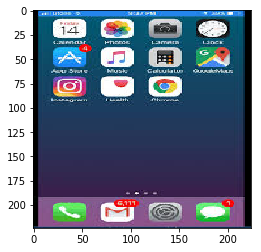

In [10]:
img = r'data\screenshots\iOS11\download.jpg'
predict_show(img)

Также возникла идея, что вводить класс "Картинки" в классификатор - это неправильно, т.к. это (как уже обсуждали) понятие-родитель для скриншотов и фото. Возможно, стоит обучить классификатор различать скриншоты и картинки.

Тогда (если взять к примеру SVM), если расстояние до границы одного из классов - [decision_function](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) - маленькое, назначать объект к этому классы. Если до обоих большое - относить к картинкам. Для этого можно ввести метрику типа f-score для этих 2-х расстояний. По ощущениям, такой подход должен дать результат получше.

## Как-то так ))

К текущему моменту потратил примерно 3 часа времени на все, так что думаю на этом можно остановиться. 
Надеюсь, что все, что здесь указал звучит reasonable).
Спасибо! 

## P.S.

Даже на macOS сработал))

['screenshots']


C:\Users\AFirsov\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


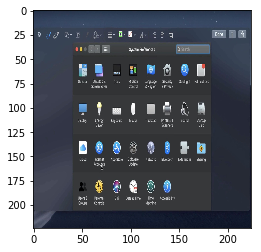

In [11]:
img = r'data\macOS_fun_test.jpg'
predict_show(img)